### Importando Bibliotecas a serem utilizadas

In [16]:
#!pip install python-bcb

In [15]:
#pip install yfinance

In [11]:
#pip install matplotlib

In [14]:
#pip install seaborn

In [40]:
#pip install pandas

In [41]:
#pip install numpy

In [2]:
import yfinance as yf
import pandas as pd
from bcb import sgs, currency
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Criando as tabelas

Utilizando a biblioteca Python 'yfinance' que possui os dados diários através do link(https://finance.yahoo.com/quote/%5EBVSP/history/)

O Yahoo Finance utiliza 5 colunas relativas a preço do ativos:

- Open -> Preço de abertura do dia do ativo (sem ajuste).
- High -> Maior preço alcançado no dia pelo ativo (sem ajuste).
- Low -> Menor preço alcançado no dia pelo ativo (sem ajuste).
- Close -> Preço de fechamento do dia do ativo (sem ajuste).
- Adj Close -> Preço de fechamento do dia do ativo (com ajuste) ##  Com o preço de fechamento, você verá apenas a mudança bruta no preço, enquanto o preço de fechamento ajustado também levará em consideração o dividendo. Para ações que não pagam dividendos, não haverá diferença entre esses dois valores.
- Volume -> Número de negócios que teve no dia.

In [3]:
#Importando os dados
start_date = '2021-05-06'
end_date = '2024-07-12'

df_origem = yf.download('^BVSP', start=start_date, end=end_date)
df_origem.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-06,119577.0,119966.0,119071.0,119921.0,119921.0,8779600
2021-05-07,119922.0,122038.0,119922.0,122038.0,122038.0,8865100
2021-05-10,122038.0,122772.0,121795.0,121909.0,121909.0,8219100
2021-05-11,121904.0,122964.0,120145.0,122964.0,122964.0,7988600
2021-05-12,122964.0,122964.0,119458.0,119710.0,119710.0,9405200


In [7]:
#pip install openpyxl

In [8]:
# Indice S&P/B3 Ibovespa VIX -> Avaliação de risco
df_vix = pd.read_excel('PerformanceGraphExport.xlsx')

In [9]:
df_vix = df_vix.set_index('Data efetiva')
df_vix.head()

,S&P/B3 Ibovespa VIX
Data efetiva,
2021-05-06,25.70
2021-05-07,24.01
2021-05-10,23.85
2021-05-11,24.97
2021-05-12,26.94


In [10]:
# Importando dados SELIC
selic_df = sgs.get(('selic', 432), start= '2021-05-06', end='2024-07-12')

selic_df.head()

,selic
Date,
2021-05-06,3.5
2021-05-07,3.5
2021-05-08,3.5
2021-05-09,3.5
2021-05-10,3.5


In [11]:
# Importando dados da taxa DOLAR
usd_brl = yf.download('BRL=X', start= '2021-05-06', end='2024-07-12')
usd_brl = usd_brl[['Close']].rename(columns={'Close':'Dollar'})
usd_brl.head()                                            

[*********************100%%**********************]  1 of 1 completed


,Dollar
Date,
2021-05-06,5.352700
2021-05-07,5.273431
2021-05-10,5.235500
2021-05-11,5.222200
2021-05-12,5.221200


In [12]:
def tabela_unica(df, df_juncao):
    df_novo = df.merge(df_juncao, how = 'left',  left_on = df_origem.index, right_on = df_juncao.index)
    df_novo.rename(columns={'key_0':'Date'}, inplace = True)
    df_novo = df_novo.set_index('Date')

    return df_novo

In [14]:
#Criando as tabelas
#VIX 
df_ibov_vix = tabela_unica(df_origem, df_vix)

#VIX + Selic
df_ibov_selic = tabela_unica(df_ibov_vix, selic_df)

#VIX + Selic + Dolar
df_ibov = tabela_unica(df_ibov_selic, usd_brl)

df_ibov.head()

,Open,High,Low,Close,Adj Close,Volume,S&P/B3 Ibovespa VIX,selic,Dollar
Date,,,,,,,,,
2021-05-06,119577.0,119966.0,119071.0,119921.0,119921.0,8779600,25.70,3.5,5.352700
2021-05-07,119922.0,122038.0,119922.0,122038.0,122038.0,8865100,24.01,3.5,5.273431
2021-05-10,122038.0,122772.0,121795.0,121909.0,121909.0,8219100,23.85,3.5,5.235500
2021-05-11,121904.0,122964.0,120145.0,122964.0,122964.0,7988600,24.97,3.5,5.222200
2021-05-12,122964.0,122964.0,119458.0,119710.0,119710.0,9405200,26.94,3.5,5.221200


In [15]:
#Fechamento vs as demais variáveis
df_close = df_ibov[['Close', 'Volume', 'S&P/B3 Ibovespa VIX', 'selic', 'Dollar']]

In [16]:
df_close.head()

,Close,Volume,S&P/B3 Ibovespa VIX,selic,Dollar
Date,,,,,
2021-05-06,119921.0,8779600,25.70,3.5,5.352700
2021-05-07,122038.0,8865100,24.01,3.5,5.273431
2021-05-10,121909.0,8219100,23.85,3.5,5.235500
2021-05-11,122964.0,7988600,24.97,3.5,5.222200
2021-05-12,119710.0,9405200,26.94,3.5,5.221200


### Análise exploratória dos dados

In [17]:
df_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 795 entries, 2021-05-06 to 2024-07-11
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Close                795 non-null    float64
 1   Volume               795 non-null    int64  
 2   S&P/B3 Ibovespa VIX  795 non-null    float64
 3   selic                795 non-null    float64
 4   Dollar               794 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 37.3 KB


In [18]:
#Quantidade de duplicados
print('Volume de duplicados na amostra: ', df_close.duplicated().sum())

Volume de duplicados na amostra:  0


In [19]:
#Estatistica descritiva
df_close.describe()

,Close,Volume,S&P/B3 Ibovespa VIX,selic,Dollar
count,795.000000,7.950000e+02,795.000000,795.000000,794.000000
mean,115352.857862,1.140796e+07,22.662101,11.102201,5.137218
std,8982.248671,3.366115e+06,4.618932,3.125273,0.232318
min,96121.000000,0.000000e+00,13.620000,3.500000,4.593800
25%,108460.000000,9.395250e+06,18.935000,10.500000,4.956725
50%,114474.000000,1.120350e+07,22.490000,12.250000,5.133900
75%,122704.000000,1.321720e+07,25.890000,13.750000,5.269125
max,134194.000000,2.602930e+07,35.390000,13.750000,5.744000


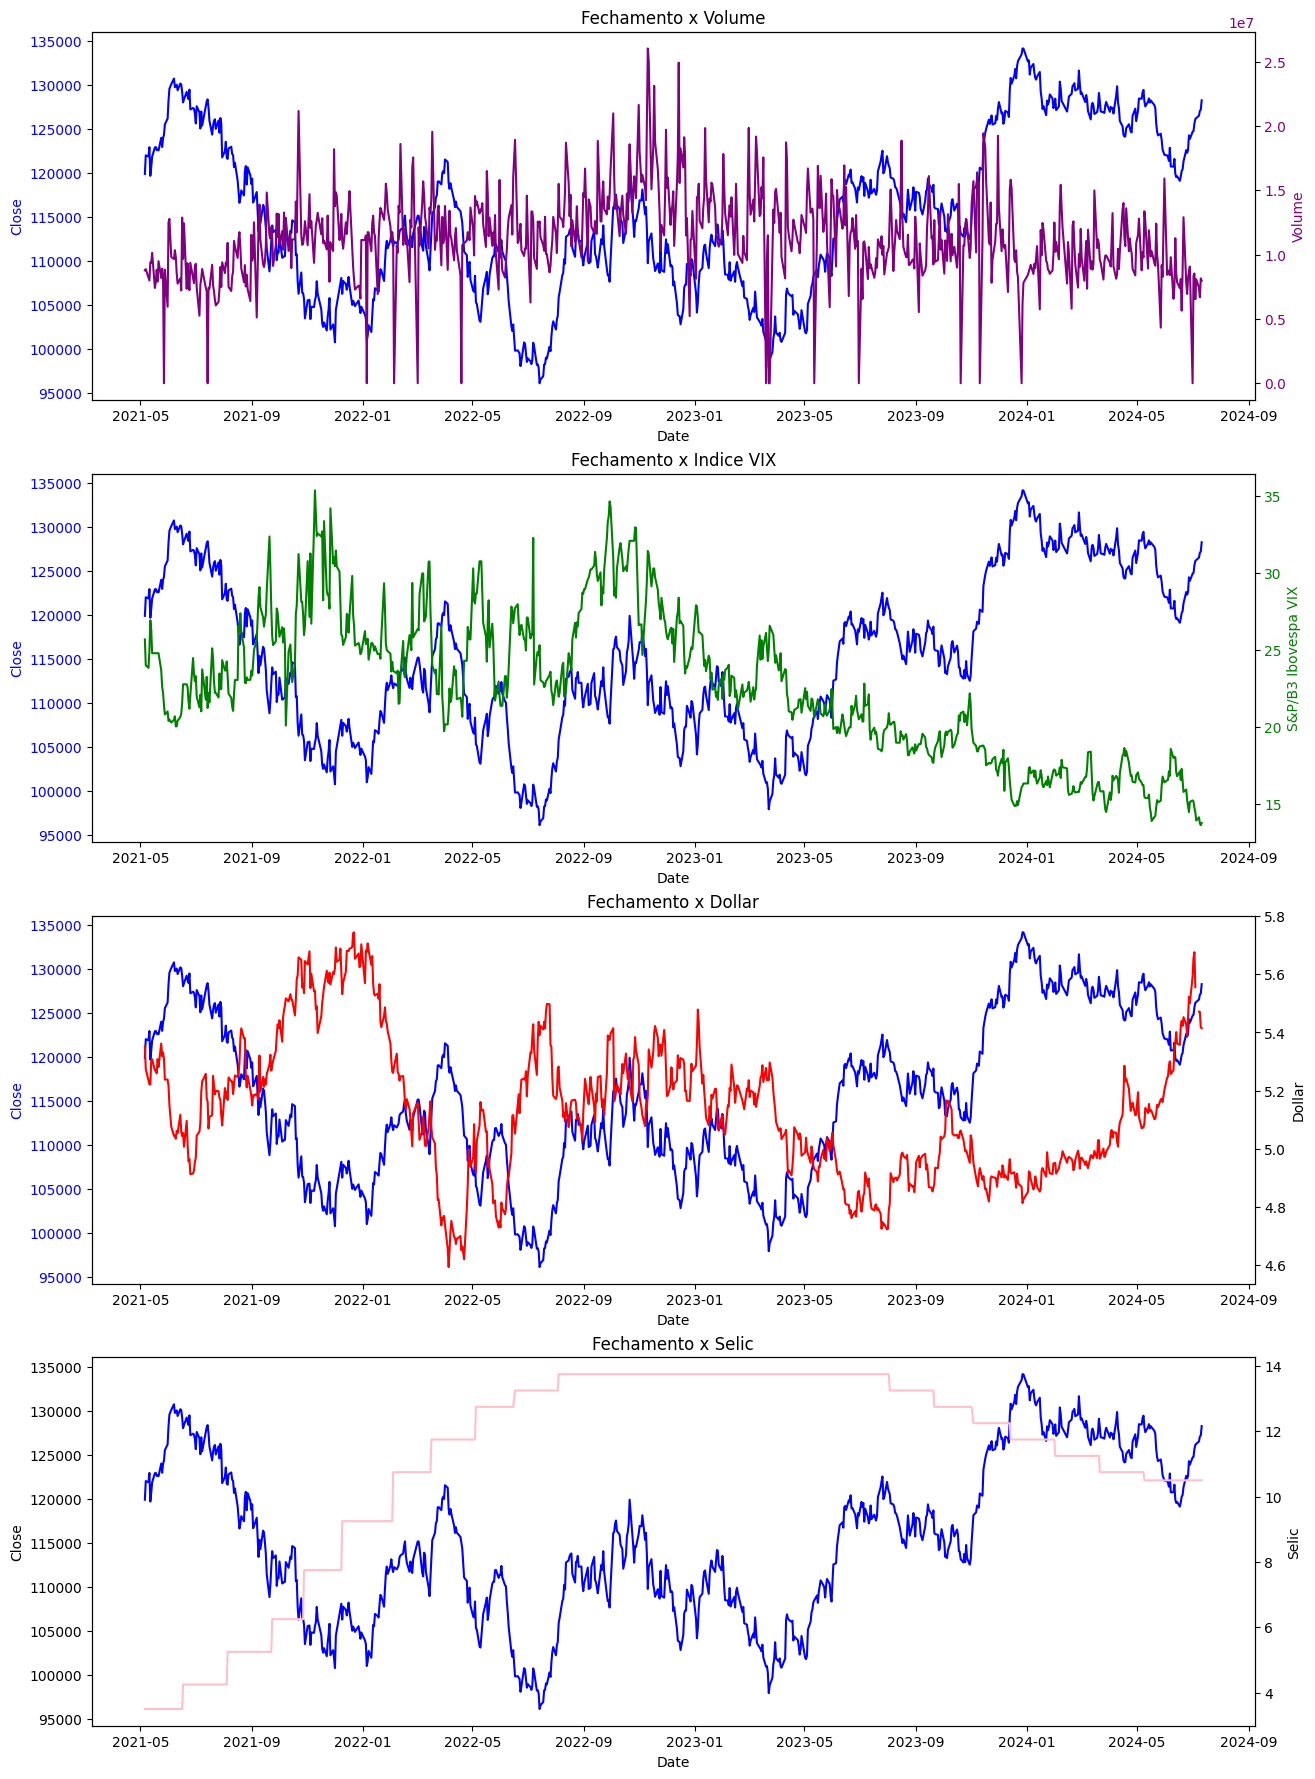

In [20]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (15, 22))
###Gráfico 3 Volume
ax1.plot(df_close.index, df_close['Close'], color='blue', label='Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Volume
ax5 = ax1.twinx()
ax5.plot(df_close.index, df_close['Volume'], color='purple', label='Volume')
ax5.set_ylabel('Volume', color='purple')
ax5.tick_params(axis='y', labelcolor='purple')


###Gráfico 3 vix
ax2.plot(df_close.index, df_close['Close'], color='blue', label='Close Price')
ax2.set_xlabel('Date')
ax2.set_ylabel('Close', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
plt.title('Fechamento x Volume')

# VIX
ax5 = ax2.twinx()
ax5.plot(df_close.index, df_close['S&P/B3 Ibovespa VIX'], color='green', label='HS&P/B3 Ibovespa VIX')
ax5.set_ylabel('S&P/B3 Ibovespa VIX', color='green')
ax5.tick_params(axis='y', labelcolor='green')
plt.title('Fechamento x Indice VIX')

###Gráfico 3 Dolar
# Fechamento x vix
ax3.plot(df_close.index, df_close['Close'], color='blue', label='Close Price')
ax3.set_xlabel('Date')
ax3.set_ylabel('Close', color='blue')
ax3.tick_params(axis='y', labelcolor='blue')

# Dollar
ax5 = ax3.twinx()
ax5.plot(df_close.index, df_close['Dollar'], color='red', label='Dollar')
ax5.set_ylabel('Dollar', color='black')
ax5.tick_params(axis='y', labelcolor='black')
plt.title('Fechamento x Dollar')

###Gráfico 4 Selic
ax4.plot(df_close.index, df_close['Close'], color='blue', label='Close Price')
ax4.set_xlabel('Date')
ax4.set_ylabel('Close', color='black')
ax4.tick_params(axis='y', labelcolor='black')

# Volume
ax5 = ax4.twinx()
ax5.plot(df_close.index, df_close['selic'], color='pink', label='Selic')
ax5.set_ylabel('Selic', color='black')
ax5.tick_params(axis='y', labelcolor='black')
plt.title('Fechamento x Selic')

#fig.suptitle('Variáveis')
plt.show()

<Axes: >

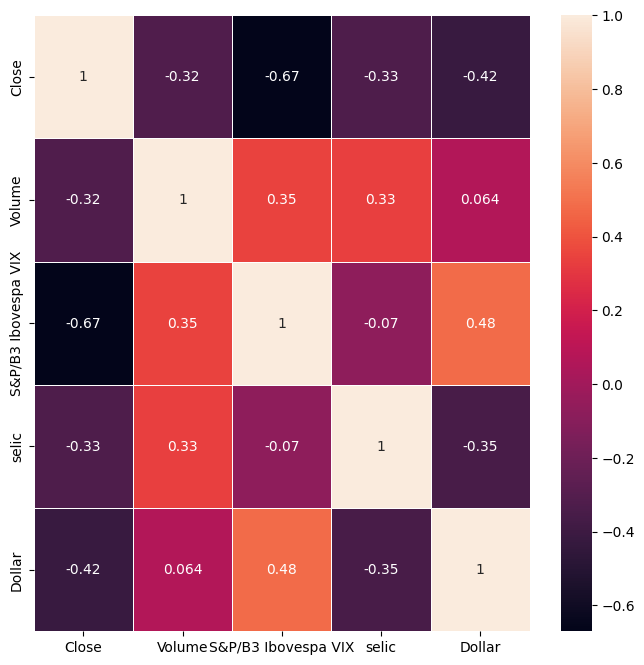

In [21]:
#Cria a matriz de correlação
correlation_matrix = df_close.corr()

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

#MODELO LSTM

In [1]:
import tensorflow as tf

In [22]:
#pip install scikit-learn

In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [24]:
#Fechamento vs as demais variáveis
df_LSTM = df_ibov[['Close', 'Volume', 'S&P/B3 Ibovespa VIX', 'selic', 'Dollar']]

In [45]:
# Normalizar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_LSTM)

In [46]:
# Criar o conjunto de dados para treino e teste
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [48]:
# Função para criar uma estrutura de dados adequada para LSTM

def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), :]
        X.append(a)
        Y.append(dataset[i + time_step, 0])  # '0' é a coluna de fechamento
    return np.array(X), np.array(Y)

time_step = 20
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [49]:
# Redimensionar os dados para [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

In [50]:
# Criar o modelo LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
#model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\victo\miniconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
# Treinar o modelo
model.fit(X_train, y_train, batch_size=1, epochs=1)

615/615 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0163


In [52]:
# Fazer previsões
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [53]:
# Reverter a normalização
train_predict = scaler.inverse_transform(
    np.concatenate((train_predict, np.zeros((train_predict.shape[0], scaled_data.shape[1] - 1))), axis=1)
)[:, 0]
test_predict = scaler.inverse_transform(
    np.concatenate((test_predict, np.zeros((test_predict.shape[0], scaled_data.shape[1] - 1))), axis=1)
)[:, 0]
y_train = scaler.inverse_transform(
    np.concatenate((y_train.reshape(-1, 1), np.zeros((y_train.shape[0], scaled_data.shape[1] - 1))), axis=1)
)[:, 0]
y_test = scaler.inverse_transform(
    np.concatenate((y_test.reshape(-1, 1), np.zeros((y_test.shape[0], scaled_data.shape[1] - 1))), axis=1)
)[:, 0]


In [55]:
# Calcular métricas de erro

#rmse = np.sqrt(mean_squared_error(y_test, test_predict))
#mae = mean_absolute_error(y_test, test_predict)
#r2 = r2_score(y_test, test_predict)

#print(f'RMSE: {rmse}')
#print(f'MAE: {mae}')
#print(f'R2: {r2}')

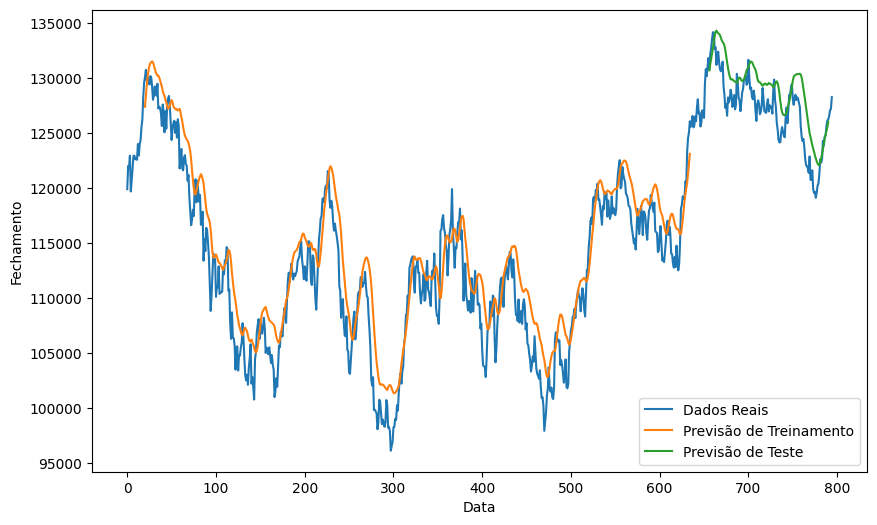

In [39]:
# Plotar os resultados
train_predict_plot = np.empty_like(scaled_data[:, 0])
train_predict_plot[:] = np.nan
train_predict_plot[time_step:len(train_predict) + time_step] = train_predict

test_predict_plot = np.empty_like(scaled_data[:, 0])
test_predict_plot[:] = np.nan
test_predict_plot[len(train_predict) + (time_step * 2) + 1:len(scaled_data) - 1] = test_predict

plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(scaled_data)[:, 0], label='Dados Reais')
plt.plot(train_predict_plot, label='Previsão de Treinamento')
plt.plot(test_predict_plot, label='Previsão de Teste')
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.legend()
plt.show()